[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MahibulHaque/Sentiment-Analysis/blob/main/toxic_dataset_sentiment_analysis.ipynb)

In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8515f5e1-9f07-d525-40e6-460f1206ad75)


In [2]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-14 20:06:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-14 20:06:56 (107 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv("https://raw.githubusercontent.com/MahibulHaque/Sentiment-Analysis/main/data/toxic/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/MahibulHaque/Sentiment-Analysis/main/data/toxic/test.csv")

In [6]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,text,Y
119105,"Geez, are you forgetful! We've already discus...",0
131631,Carioca RFA \n\nThanks for your support on my ...,0
125326,"""\n\n Birthday \n\nNo worries, It's what I do ...",0
111256,Pseudoscience category? \n\nI'm assuming that ...,0
83590,"(and if such phrase exists, it would be provid...",0


In [7]:
# The test data doesn't have a target (that's what we'd try to predict)
test_df.head()

,text,Y
0,Thank you for understanding. I think very high...,0
1,:Dear god this site is horrible.,0
2,"""::: Somebody will invariably try to add Relig...",0
3,""" \n\n It says it right there that it IS a typ...",0
4,""" \n\n == Before adding a new product to the l...",0


In [8]:
# How many examples of each class?
train_df.Y.value_counts()

0    144277
1     15294
Name: Y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


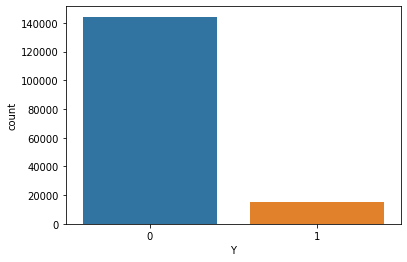

In [9]:
import seaborn as sns
sns.countplot(train_df['Y'])

In [10]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = train_df[(train_df['Y']==0)] 
df_minority = train_df[(train_df['Y']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 144277, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


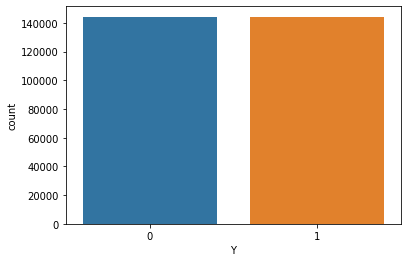

In [11]:
sns.countplot(df_upsampled['Y'])

In [12]:
df_upsampled.head()

,text,Y
74761,""" (UTC)\n\nAnd what would you say otherwise? H...",1
8708,"You need psychological help, IP editor. The WP...",1
55630,"So does your mouth, you gayass",1
139968,sorry \n\ni stepped away for a second and my f...,1
53262,African Black penis size compared to white pen...,1


In [13]:
df_upsampled.tail()

,text,Y
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0
159570,"""\nAnd ... I really don't think you understand...",0


In [14]:
# Shuffle training dataframe
train_df_shuffled = df_upsampled.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,text,Y
97136,kids incorporated \n\nSHUT THE HELL UP.,1
136910,hello. fastlife deleted \n\nHey just wondering...,0
58883,i read on the box of the game that broadband i...,0
111496,i removed eveyrthing. -),0
138488,"Welcome!\nHello, Jotunnorske, and welcome to W...",0


In [15]:
# How many samples total?
print(f"Total training samples: {len(df_upsampled)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(df_upsampled) + len(test_df)}")

Total training samples: 288554
Total test samples: 63978
Total samples: 352532


In [16]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(df_upsampled)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "Y"]][random_index:random_index+5].itertuples():
  _, text, Y = row
  print(f"Target: {Y}", "(toxic sentence)" if Y > 0 else "(not toxic)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (toxic sentence)
Text:
Get a reality grip! 

You suck, try to be responsible and take youre elected resonability for real, and be objective...

---

Target: 0 (not toxic)
Text:
September 2008 (UTC)
UPDATE: I did this.   03:49, 14

---

Target: 1 (toxic sentence)
Text:
.

Also! The interview where he claimed to be German he claimed to be German JEW, look it up to the idiot who keeps erasing my edit

---

Target: 1 (toxic sentence)
Text:
You're an 38ass fuck43 

3Go shit your pants43

---

Target: 1 (toxic sentence)
Text:
You're cool

You seem like a really cool guy... *bursts out laughing at sarcasm*.

---



In [17]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["Y"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [18]:

# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(259698, 259698, 28856, 28856)

In [19]:

# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['By Finnish standards that wouldnt even be seen as an attack, but if that user felt bad about it tell him or her that im sorry (Not sure if my message got through), thats the way we talk here. Deal with it. Commie Soviet Union pigs had to learn the hard way too in WW2 between Finland and the evil empire. Also deal with the fact that all Lisa Williams had been sent to prison if these fucking hustlers had plotted shit like that in Finland.',
        "Yes, douche, but an article DOES have to be neutral.  Happyme22 has consistently been aggressiv in keeping the Nancy Reagan article skewed towards her favor.  If you check that article's talk page, you will see several admissions by him that he IS clearly in her favor, and that his edits to her article are aggressive in such a manner that there should be no question of his bias.  That you (and other adtiors/administrators) have been so lax in blocking him for making non-NPOV edits to her articleonly goes to prove -again- that Wikiped

## Converting text into numbers
Wonderful! We've got a training set and a validation set containing Tweets and labels.

Our labels are in numerical form (0 and 1) but our Tweets are in string form.

🤔 Question: What do you think we have to do before we can use a machine learning algorithm with our text data?

If you answered something along the lines of "turn it into numbers", you're correct. A machine learning algorithm requires its inputs to be in numerical form.

In NLP, there are two main concepts for turning text into numbers:

**Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
**Character-level tokenization**, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
**Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.
**Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as `tf.keras.layers.Embedding`) and an embedding representation will be learned during model training.
Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

In [20]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [21]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

60

In [22]:
# Setup text vectorization with custom variables
max_vocab_length = 40000 # max number of words to have in our vocabulary
max_length = 60 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [23]:

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [24]:
# Create sample sentence and tokenize it
sample_sentence = "I hate you!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 60), dtype=int64, numpy=
array([[ 6, 94,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>

In [25]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
hey jerk 

go write about gardening or britney spears or toby keith and FUCKING stop ruining articles on topics you have no damn clue about.      

Vectorized version:


<tf.Tensor: shape=(1, 60), dtype=int64, numpy=
array([[  264,  1000,    64,   349,    42, 26842,    30,  9414, 10206,
           30, 14869,  4883,     7,    81,   114,  1284,   104,    18,
         1550,     3,    20,    47,   269,  2218,    42,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0]])>

In [26]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 40000
Top 5 most common words: ['', '[UNK]', 'the', 'you', 'to']
Bottom 5 least common words: ['greenman', 'greatful', 'grea', 'gratefully', 'grapple']


## Creating an Embedding using an Embedding Layer
We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
input_length - Length of sequences being passed to embedding layer.
Knowing these, let's make an embedding layer

In [27]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [28]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Sory ToDST that was All My Roomates! They came in and Stormed my computer and Called You Gay! Which Your Not!      

Embedded version:


<tf.Tensor: shape=(1, 60, 128), dtype=float32, numpy=
array([[[ 0.03189236,  0.02247218,  0.0407537 , ..., -0.01647086,
          0.04109469, -0.0499515 ],
        [-0.01933004,  0.01307039, -0.01124482, ..., -0.03501333,
          0.04731646, -0.02222626],
        [-0.03508195,  0.01448471,  0.00513798, ...,  0.04485155,
          0.03976364, -0.03543619],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [29]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03189236,  0.02247218,  0.0407537 , -0.01482048,  0.01244533,
       -0.03970676, -0.01959174, -0.02130445, -0.01770921, -0.02340173,
       -0.00583392, -0.02434   , -0.02275949, -0.0219172 , -0.00987709,
       -0.04115373, -0.02982583,  0.04298922,  0.02964309, -0.00983932,
        0.03929787, -0.00753308,  0.02947078,  0.00119908, -0.03825483,
        0.00292561, -0.01190767,  0.00203359,  0.01753918, -0.03924812,
       -0.00566458, -0.02361153,  0.02678504,  0.02090645,  0.0486042 ,
       -0.02832842,  0.006573  , -0.02784554, -0.03836202,  0.02578933,
       -0.02020677,  0.02955696,  0.01196317, -0.00851298, -0.0378455 ,
       -0.00419575, -0.01113218, -0.03655435, -0.04364927,  0.00423124,
        0.00054156, -0.0458966 , -0.02546015,  0.00946205,  0.03050101,
        0.0432516 ,  0.03602627, -0.03990146, -0.00675676, -0.03765406,
        0.00818088,  0.01394014,  0.03879924,  0.03497056, -0.00710266,
        0.017434

## Model 0: Baseline Model (Multinomial Naive Bayes)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 91.92%


In [32]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [33]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [34]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 91.91502633767674,
 'f1': 0.9191042621078119,
 'precision': 0.919645119138504,
 'recall': 0.9191502633767674}

In [35]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

## Model 2: LSTM
With all this talk of what RNN's are and what they're good for, I'm sure you're eager to build one.

We're going to start with an LSTM-powered RNN.

To harness the power of the LSTM cell (LSTM cell and LSTM layer are often used interchangably) in TensorFlow, we'll use tensorflow.keras.layers.LSTM().

Our model is going to take on a very similar structure to model_1:

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
The main difference will be that we're going to add an LSTM layer between our embedding and output.

And to make sure we're not getting reusing trained embeddings (this would involve data leakage between models, leading to an uneven comparison later on), we'll create another embedding layer (model_2_embedding) for our model. The text_vectorizer layer can be reused since it doesn't get updated during training.

> 🔑 Note: The reason we use a new embedding layer for each model is since the embedding layer is a learned representation of words (as numbers), if we were to use the same embedding layer (embedding_1) for each model, we'd be mixing what one model learned with the next. And because we want to compare our models later on, starting them with their own embedding layer each time is a better idea.

In [36]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 60, 128)
(None, 64)


In [37]:

# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 60)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 60, 128)           5120000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 5,169,473
Trainable params: 5,169,473
Non-trainable params: 0
____________________________________________

In [40]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220814-201051
Epoch 1/5
8116/8116 [==============================] - 88s 11ms/step - loss: 0.1310 - accuracy: 0.9543 - val_loss: 0.0899 - val_accuracy: 0.9697
Epoch 2/5
8116/8116 [==============================] - 89s 11ms/step - loss: 0.0575 - accuracy: 0.9802 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 3/5
8116/8116 [==============================] - 86s 11ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0459 - val_accuracy: 0.9865
Epoch 4/5
8116/8116 [==============================] - 86s 11ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0322 - val_accuracy: 0.9915
Epoch 5/5
8116/8116 [==============================] - 85s 10ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0324 - val_accuracy: 0.9925


In [41]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

((28856, 1), array([[9.9992788e-01],
        [9.9996734e-01],
        [2.1160315e-05],
        [2.5595925e-06],
        [2.1833459e-06],
        [9.9990988e-01],
        [9.9889034e-01],
        [9.9997616e-01],
        [9.9856395e-01],
        [1.4081387e-03]], dtype=float32))

In [42]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [43]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 99.2479900194067,
 'f1': 0.9924790118365551,
 'precision': 0.9925478758595324,
 'recall': 0.9924799001940671}

In [44]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_2_results)

Baseline accuracy: 91.92, New accuracy: 99.25, Difference: 7.33
Baseline precision: 0.92, New precision: 0.99, Difference: 0.07
Baseline recall: 0.92, New recall: 0.99, Difference: 0.07
Baseline f1: 0.92, New f1: 0.99, Difference: 0.07


In [45]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 91.92, New accuracy: 99.25, Difference: 7.33
Baseline precision: 0.92, New precision: 0.99, Difference: 0.07
Baseline recall: 0.92, New recall: 0.99, Difference: 0.07
Baseline f1: 0.92, New f1: 0.99, Difference: 0.07


## Model 2: GRU (Gated Recurrent Unit)

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

>📖 Resource: A full explanation of the GRU cell is beyond the scope of this noteook but I'd suggest the following resources to learn more:
  * [Gated Recurrent Unit](https://en.wikipedia.org/wiki/Gated_recurrent_unit) Wikipedia page
  * [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) by Simeon Kostadinov

To use the GRU cell in TensorFlow, we can call the `tensorflow.keras.layers.GRU()` class.

The architecture of the GRU-powered model will follow the same structure we've been using:

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

Again, the only difference will be the layer(s) we use between the embedding and the output.

In [46]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [47]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [48]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 60)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 60, 128)           5120000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,157,313
Trainable params: 5,157,313
Non-trainable params: 0
_____________________________________________

In [49]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20220814-201819
Epoch 1/5
8116/8116 [==============================] - 90s 11ms/step - loss: 0.1470 - accuracy: 0.9428 - val_loss: 0.0704 - val_accuracy: 0.9773
Epoch 2/5
8116/8116 [==============================] - 93s 11ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0405 - val_accuracy: 0.9884
Epoch 3/5
8116/8116 [==============================] - 85s 10ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0393 - val_accuracy: 0.9898
Epoch 4/5
8116/8116 [==============================] - 104s 13ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0276 - val_accuracy: 0.9930
Epoch 5/5
8116/8116 [==============================] - 91s 11ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0277 - val_accuracy: 0.9936


In [50]:

# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

((28856, 1), array([[9.9992895e-01],
        [9.9998963e-01],
        [6.5449117e-06],
        [4.1240730e-07],
        [1.8752935e-07],
        [9.9995053e-01],
        [9.9989367e-01],
        [9.9999726e-01],
        [9.9998069e-01],
        [4.6234438e-04]], dtype=float32))

In [51]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [52]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 99.36235098419739,
 'f1': 0.9936228295934573,
 'precision': 0.9936817652062536,
 'recall': 0.9936235098419739}

In [53]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 91.92, New accuracy: 99.36, Difference: 7.45
Baseline precision: 0.92, New precision: 0.99, Difference: 0.07
Baseline recall: 0.92, New recall: 0.99, Difference: 0.07
Baseline f1: 0.92, New f1: 0.99, Difference: 0.07


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(val_labels, model_3_preds)
cm 

array([[14055,   171],
       [   13, 14617]])

Text(69.0, 0.5, 'Actual')

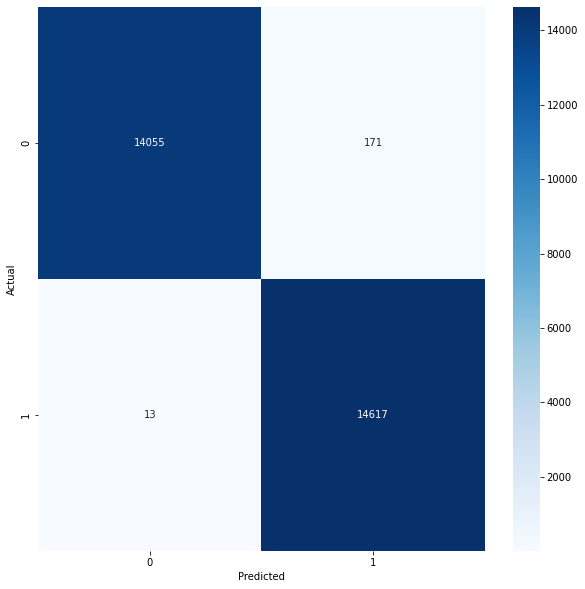

In [66]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 10))
sn.heatmap(cm, annot=True,fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Model 4: BERT

BERT, which stands for Bidirectional Encoder Representations from Transformers, is based on Transformers, a deep learning model in which every output element is connected to every input element, and the weightings between them are dynamically calculated based upon their connection.